<a href="https://colab.research.google.com/github/obaidsafi51/XOR-Solution-in-pyTorch/blob/main/XOR_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
x1 = np.array([0.,0.,1.,1.], dtype = np.float32)
x2 = np.array([0.,1.,0.,1.],dtype = np.float32)
y = np.array([0.,0.,0.,1.],dtype = np.float32)

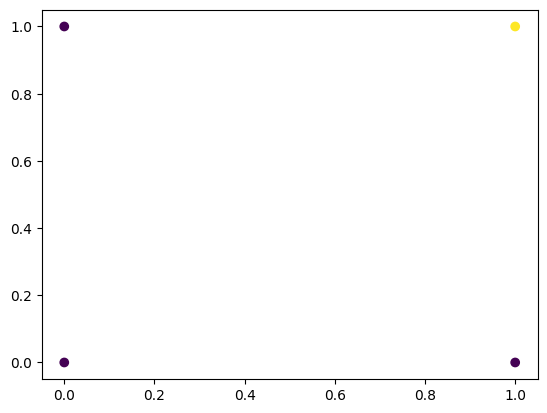

In [3]:
plt.scatter(x1,x2,c=y)
plt.show()

In [4]:
def create_dataset(x1,x2, y):
  x1 = np.repeat(x1 ,50)
  x2 = np.repeat(x2 ,50)
  y = np.repeat(y ,50)

  x1 += np.random.rand(x1.shape[0]) * 0.05
  x2 += np.random.rand(x2.shape[0]) * 0.05

  #shuffle

  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y = y[index_shuffle]

  x1_torch = torch.from_numpy(x1).clone().view(-1,1) # Call clone() as a function and call view on the result
  x2_torch = torch.from_numpy(x2).clone().view(-1,1) # Call clone() as a function and call view on the result
  y_torch = torch.from_numpy(y).clone().view(-1,1) # Call clone() as a function and call view on the result

  X = torch.hstack((x1_torch,x2_torch))

  X_train = X[:150,:]
  x_test = X[150:,:]
  y_train = y_torch[:150]
  y_test = y_torch[150:]

  return X_train, y_train, x_test, y_test

In [5]:
X_train, y_train, x_test, y_test = create_dataset(x1, x2 ,y)

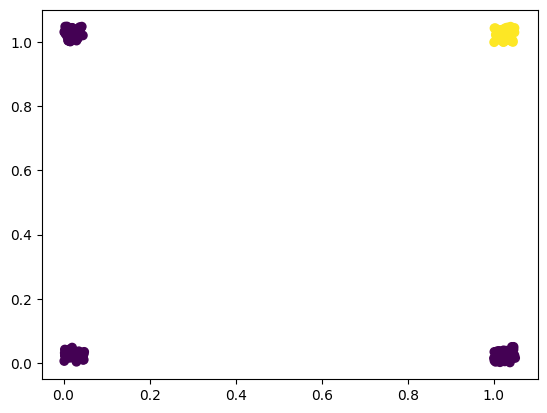

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [7]:
class LogisticRegression(torch.nn.Module):
  def __init__(self, inputDim, outputDim):
    super(LogisticRegression, self).__init__() # Call super().__init__() before assigning any modules
    self.linear = torch.nn.Linear(inputDim, outputDim)

  def forward(self, x):
    outputs = torch.sigmoid(self.linear(x))
    return outputs

## **AND Operation on Data**

In [8]:
model_AND = LogisticRegression(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_AND.parameters(), lr = 0.01)

In [9]:
def train(model, criterion, optimizer,x,y,itr):
  allLoss= []

  for epoch in range(itr):
    y_hat = model(x)
    loss = criterion(y_hat, y)
    allLoss.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  return allLoss

In [10]:
all_loss = train(model_AND, criterion, optimizer, X_train, y_train, 50000)

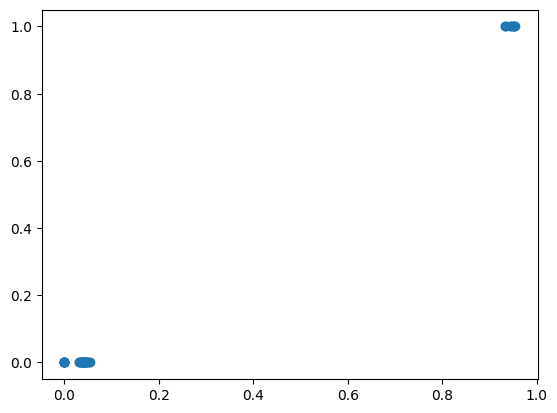

In [11]:
y_pred = model_AND.forward(x_test)
plt.scatter(y_pred.detach().numpy(),y_test)
plt.show()

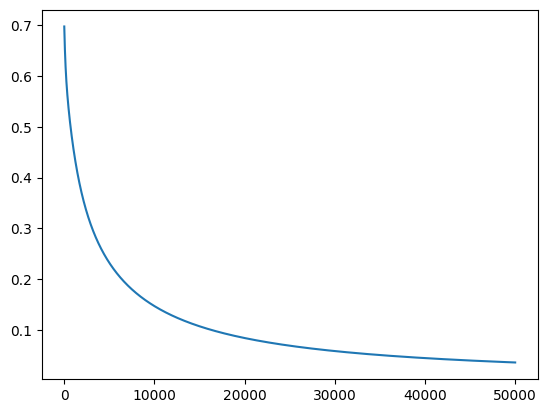

In [12]:
plt.plot(all_loss)
plt.show()

# **OR Operations**

In [13]:
x1 = np.array([0.,0.,1.,1.], dtype = np.float32)
x2 = np.array([0.,1.,0.,1.],dtype = np.float32)
y = np.array([0.,1.,1.,1.],dtype = np.float32)

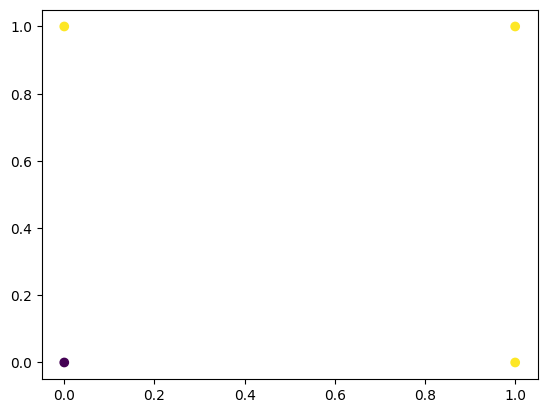

In [14]:
plt.scatter(x1, x2, c = y)

In [15]:
X_train, y_train, x_test, y_test = create_dataset(x1, x2 ,y)

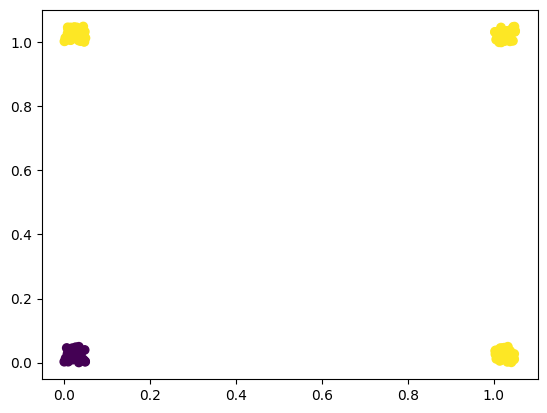

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

In [17]:
model_OR = LogisticRegression(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_OR.parameters(), lr = 0.01)

In [18]:
all_loss = train(model_OR, criterion, optimizer, X_train, y_train, 50000)

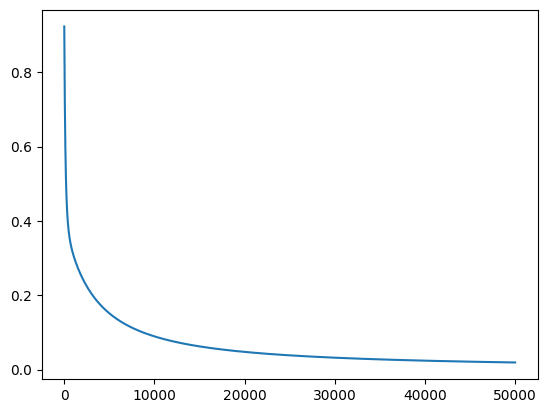

In [19]:
plt.plot(all_loss)

# **NAND Operations on Data**

In [20]:
x1 = np.array([0.,0.,1.,1.], dtype = np.float32)
x2 = np.array([0.,1.,0.,1.],dtype = np.float32)
y = np.array([1.,1.,1.,0.],dtype = np.float32)

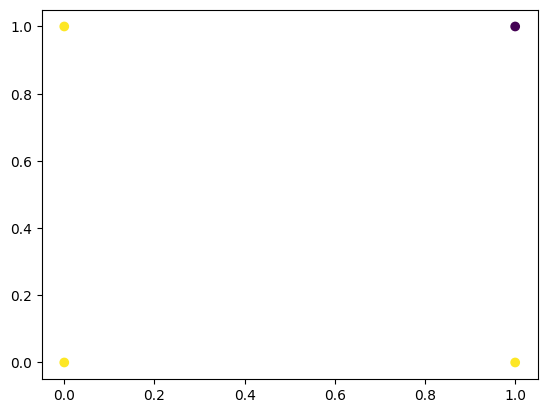

In [21]:
plt.scatter(x1,x2,c=y)
plt.show()

In [22]:
X_train, y_train, x_test, y_test = create_dataset(x1, x2 ,y)

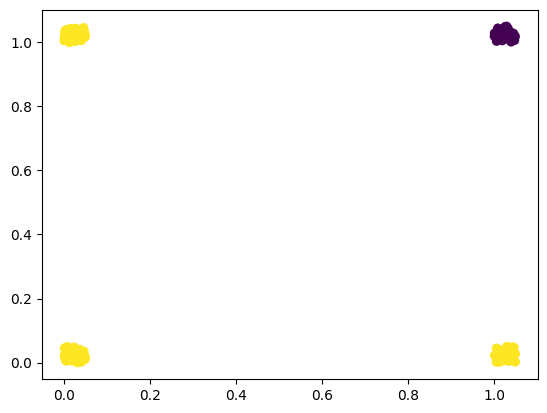

In [23]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [24]:
model_NAND = LogisticRegression(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_NAND.parameters(), lr = 0.01)

In [25]:
all_loss = train(model_NAND, criterion, optimizer, X_train, y_train, 50000)

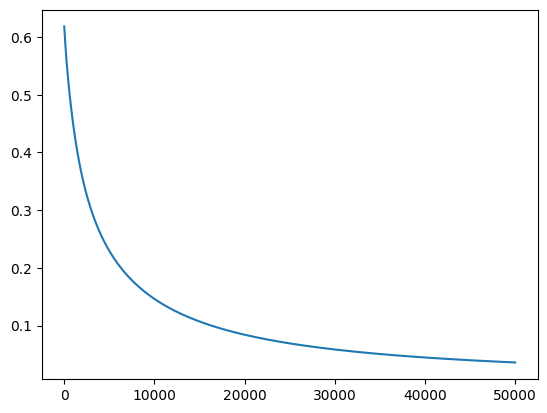

In [26]:
plt.plot(all_loss)

# **XOR Operations on Data**

In [27]:
x1 = np.array([0.,0.,1.,1.], dtype = np.float32)
x2 = np.array([0.,1.,0.,1.],dtype = np.float32)
y = np.array([0.,1.,1.,0.],dtype = np.float32)

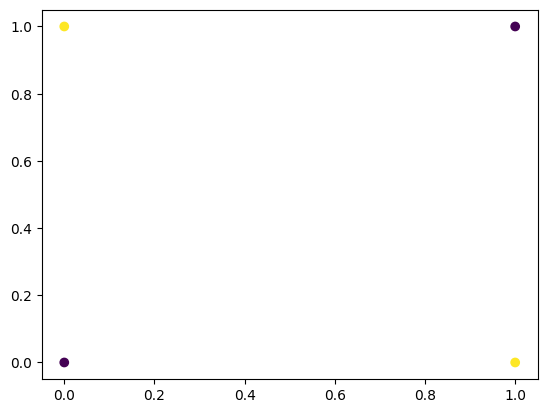

In [28]:
plt.scatter(x1,x2,c=y)
plt.show()

In [29]:
X_train,y_train,x_test,y_test = create_dataset(x1,x2,y)

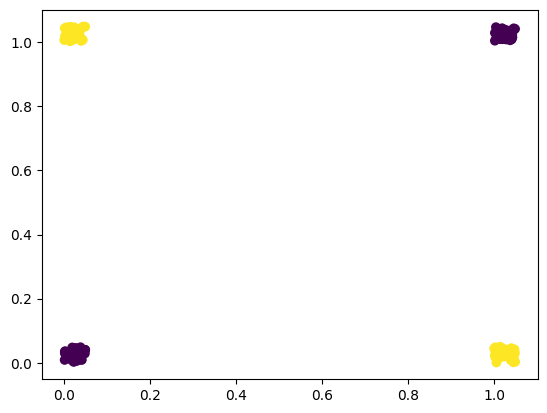

In [30]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [35]:
test = 6

h1 = model_OR.forward(X_train[test])
h2 = model_NAND.forward(X_train[test])
h3 = model_AND.forward(torch.tensor([h1,h2]))

In [36]:
print(h3)
print(y_test[test])

tensor([0.9053], grad_fn=<SigmoidBackward0>)
tensor([1.])


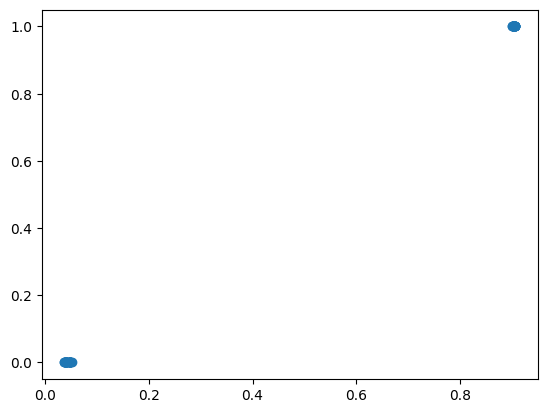

In [40]:
h1 = model_OR.forward(x_test)
h2 = model_NAND.forward(x_test)
h3 = model_AND.forward(torch.hstack([h1,h2]))
plt.scatter(h3.detach().numpy(),y_test)
plt.show()